# 2024-05-29 · Residuals linefit

In [1]:
include("lib/Nto1.jl")

using Revise … ✔ (0.3 s)
using Units, Nto1AdEx, ConnectionTests, ConnTestEval, MemDiskCache … ✔ (0.7 s)
using StatsBase … ✔ (0.1 s)


In [3]:
N = 6500
duration = 10minutes;

In [5]:
@time sim = Nto1AdEx.sim(N, duration);

  2.855229 seconds (21.50 k allocations: 912.268 MiB, 6.38% gc time)


In [10]:
((_, exc), _...) = get_trains_to_test(sim; Nₜ=1);
train = only(exc)

SpikeTrain(58522 spikes, 97.5 Hz, [0.00467, 0.0148, 0.045, 0.0473, 0.0584, 0.0758, 0.0927, 0.106, 0.109, 0.11  …  600, 600, 600, 600, 600, 600, 600, 600, 600, 600])

In [11]:
m = FitUpstroke()

FitUpstroke(100, 0)

In [12]:
fit = ConnectionTests.fitwins(m, sim.V, train.times)

(X = [1 1; 1 2; … ; 1 99; 1 100], y = [-0.064, -0.0639, -0.0639, -0.0638, -0.0638, -0.0637, -0.0637, -0.0637, -0.0636, -0.0636  …  -0.0564, -0.0564, -0.0564, -0.0564, -0.0564, -0.0563, -0.0563, -0.0563, -0.0563, -0.0563], β̂ = [-0.054, 2.21E-07], intercept = -0.054, slope = 2.21E-07, predictions = [-0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054  …  -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054, -0.054], residuals = [-0.00991, -0.00987, -0.00982, -0.00978, -0.00974, -0.0097, -0.00966, -0.00961, -0.00957, -0.00952  …  -0.00233, -0.00233, -0.00233, -0.00233, -0.00232, -0.00232, -0.00232, -0.00232, -0.00232, -0.00232])

In [13]:
include("lib/plot.jl")

import PythonCall … ✔ (2.9 s)
import PythonPlot … ✔ (11.8 s)
using Sciplotlib … ✔ (0.6 s)
using PhDPlots … ✔


In [17]:
xvals = fit.X[:,2];

Saved at `../thesis/figs/residuals_vs_time.png`

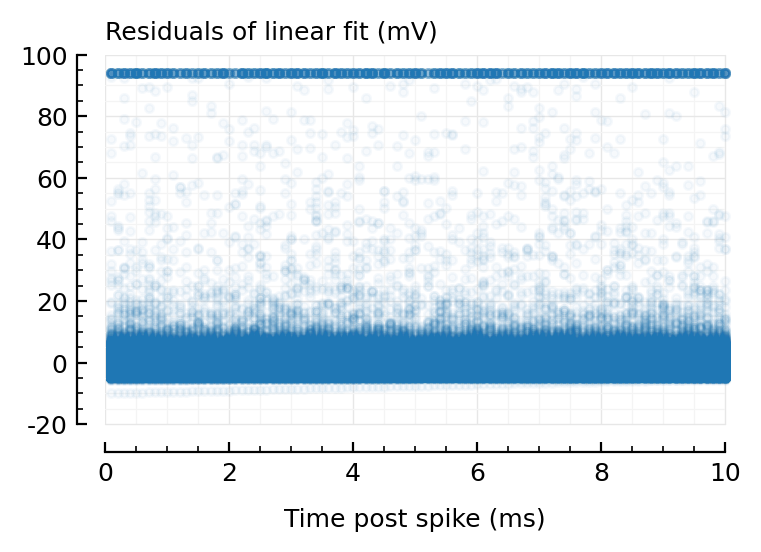

In [53]:
plot(xvals ./ 10, fit.residuals / mV, ".", alpha=0.04, xlabel="Time post spike (ms)", hylabel="Residuals of linear fit (mV)");
savefig_phd("residuals_vs_time", filetype="png")

Saved at `../thesis/figs/residuals_distplot.png`

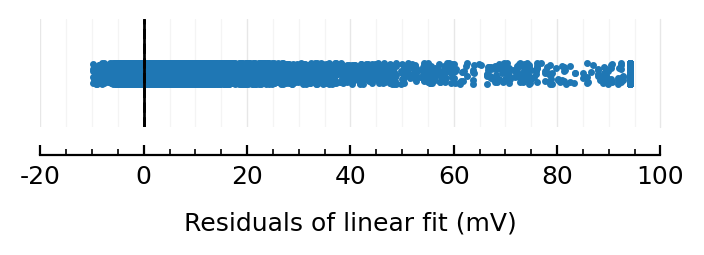

In [52]:
ax = newax(figsize=(4,0.7))   # (4,0.4) gives `Python: IndexError: index 0 is out of bounds for axis 0 with size 0`.
distplot(fit.residuals / mV; ax, xlabel="Residuals of linear fit (mV)");
savefig_phd("residuals_distplot", filetype="png")

In [58]:
StatsBase.mean(fit.residuals / mV)

-5.86E-12

In [59]:
StatsBase.median(fit.residuals / mV)

0.093